# Import Libraries



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Generate Dataset

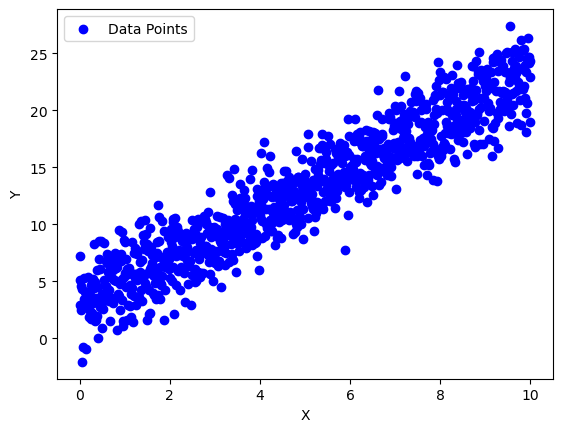

In [2]:
a = 2.0
b = 3.0
n = 1000

x = np.linspace(0, 10, n)
noise = np.random.normal(0, 2, n)
y = a * x + b + noise
 
# plot
plt.scatter(x, y, label='Data Points', color='blue')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()



# Initializa Parameters

In [3]:
w_init = np.random.rand(1)
b_init = np.random.rand(1)

default_learning_rate = 0.02
epochs = 100000

# generate all random-indexes

In [4]:

random_indexes = np.random.randint(0,len(x),epochs)


In [5]:
def AMSGrad(w,b,learning_rate):
    sw = 0
    sb = 0
    
    vw = 0
    vb = 0
    
    vw_hat = 0
    vb_hat = 0
    
    sw_hat = 0
    sb_hat = 0
    
    epsilon = 0.0000001
    beta1 = 0.9
    beta2 = 0.999
    for epoch in range(1,epochs+1):
        random_index = random_indexes[epoch-1]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = w * x_i + b
        error = (y_i - y_pred)
        
        dw =  error * -1 * x_i
        db =  error * -1 * 1
        
        beta1_current = beta1/epoch
        vw = beta1_current * vw + (1 - beta1_current) * dw 
        vb = beta1_current * vb + (1 - beta1_current) * db        
    
        sw = beta2 * sw +(1-beta2) * (dw ** 2)
        sb = beta2 * sb +(1-beta2) * (db ** 2)
        
        sw_hat = max(sw,sw_hat)
        sb_hat = max(sb,sb_hat)
               
        learning_rate_current = learning_rate / math.sqrt(epoch)
        w = w - (learning_rate_current / (math.sqrt(sw_hat)+epsilon)) * vw
        b = b - (learning_rate_current / (math.sqrt(sb_hat)+epsilon)) * vb
    return w,b

w_AMSGrad,b_AMSGrad = AMSGrad(w_init,b_init,default_learning_rate)
print("AMSGrad Trained weight:", w_AMSGrad)
print("AMSGrad Trained bias:", b_AMSGrad)

AMSGrad Trained weight: [1.99552176]
AMSGrad Trained bias: [3.04543192]


In [6]:
def AdamX(w,b,learning_rate):
    sw = 0
    sb = 0
    
    vw = 0
    vb = 0 
    
    sw_hat = 0
    sb_hat = 0
    
    epsilon = 0.0000001
    beta1 = 0.9
    beta2 = 0.999
    learning_rate_t = learning_rate
    
    for epoch in range(1,epochs+1):
        random_index = random_indexes[epoch-1]

        x_i = x[random_index]
        y_i = y[random_index]
        y_pred = w * x_i + b
        error = (y_i - y_pred)
        
        dw =  error * -1 * x_i
        db =  error * -1 * 1
        
        beta1_current = beta1/epoch
        vw = beta1_current * vw + (1 - beta1_current) * dw 
        vb = beta1_current * vb + (1 - beta1_current) * db        
    
        sw = beta2 * sw +(1-beta2) * (dw ** 2)
        sb = beta2 * sb +(1-beta2) * (db ** 2)
        
        if(epoch==1):
            sw_hat = sw
            sb_hat = sb
        else:
            beta1_past= beta1/(epoch-1)
            sw_hat = max((1-beta1_current)**2/(1-beta1_past)**2 * sw_hat,sw)
            sb_hat = max((1-beta1_current)**2/(1-beta1_past)**2 * sb_hat,sb)
              
        learning_rate_current = learning_rate / math.sqrt(epoch)
        w = w - (learning_rate_current / (math.sqrt(sw_hat)+epsilon))* vw
        b = b - (learning_rate_current / (math.sqrt(sb_hat)+epsilon)) * vb
    return w,b

w_AdamX,b_AdamX = AdamX(w_init,b_init,default_learning_rate)
print("AdamX Trained weight:", w_AdamX)
print("AdamX Trained bias:", b_AdamX)

AdamX Trained weight: [2.00193133]
AdamX Trained bias: [3.02044934]


In [7]:
def CalculateMSE(x,y,w,b):
    sigma_error = 0
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        y_pred = w * x_i + b
        error = (y_i - y_pred)
        sigma_error +=error**2

    MSE = sigma_error/n
    return MSE
 
AMSGrad_MSE = CalculateMSE(x,y,w_AMSGrad,b_AMSGrad)
AdamX_MSE = CalculateMSE(x,y,w_AdamX,b_AdamX)

print('AMSGrad_MSE: ', AMSGrad_MSE)
print('AdamX_MSE: ', AdamX_MSE)


AMSGrad_MSE:  [4.23702571]
AdamX_MSE:  [4.23639993]


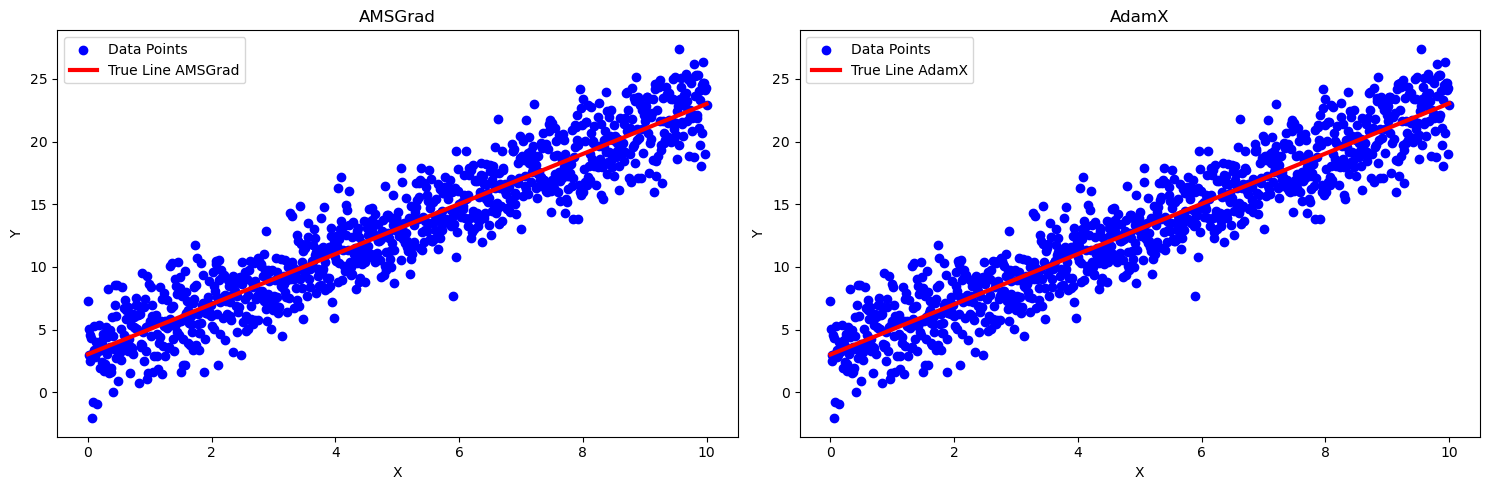

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(x, y, label='Data Points', color='blue') 
axes[0].plot(x, w_AMSGrad * x  + b_AMSGrad , label=f'True Line AMSGrad', color='red', linestyle='-', linewidth=3)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title('AMSGrad')
axes[0].legend()

axes[1].scatter(x, y, label='Data Points', color='blue') 
axes[1].plot(x, w_AdamX * x  + b_AdamX , label=f'True Line AdamX', color='red', linestyle='-', linewidth=3)
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title('AdamX')
axes[1].legend()

plt.tight_layout()
plt.show()
